In [6]:
d = {'Name':'Hello'}

# Extract the first two characters of the key and last two characters of the value
key_part = d['Name'][:2]
value_part = d['Name'][-2:]

# Print the result in the desired format
print(f"({key_part} : {value_part})")

    

(He : lo)


In [7]:
d = {'Name': 'Hello'}

# Extract the first two characters of the key and the last two characters of the value
key_part = list(d.keys())[0][:2]  # First two characters of the key
value_part = d['Name'][-2:]        # Last two characters of the value

# Print the result in the desired format
print(f"({key_part} : {value_part})")


(Na : lo)


In [8]:
new_dict = {k[:2] : v[-2:] for k, v in d.items()}
print(new_dict)

{'Na': 'lo'}


# PROJECT  NAME- INSURANCE DOMAIN
### PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS

# BUSINESS PROBLEM STATEMENT
### Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

## About Dataset
1.	policy_id: The unique identifier for each insurance policy.
2.	policy_tenure: The length of time (in years) that the policy has been active.
3.	age_of_car: The age of the insured car (in years) at the time the policy was taken.
4.	age_of_policyholder: The age of the policyholder (in years) at the time the policy was taken.
5.	area_cluster: A categorical variable representing the cluster or category to which the area of residence belongs.
6.	population_density: A measure of the population density of the area where the policyholder resides.
7.	Make:  The make or manufacturer of the insured car.
8.	segment: The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).
9.	model: The specific model or variant of the insured car.
10.	fuel_type: The type of fuel used by the insured car (e.g., petrol, diesel, electric).
11.	max_torque: The maximum torque output of the car's engine.
12.	max_power: The maximum power output of the car's engine.
13.	engine_type: The type of engine used in the insured car (e.g., inline, V-type).
14.	airbags: The number of airbags installed in the car.
15.	is_esc: A binary variable indicating whether the car has an electronic stability control (ESC) system.
16.	is_adjustable_steering: A binary variable indicating whether the car has adjustable steering.
17.	is_tpms: A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).
18.	is_parking_sensors: A binary variable indicating whether the car has parking sensors.
19.	is_parking_camera: A binary variable indicating whether the car has a parking camera.
20.	rear_brakes_type: The type of rear brakes used in the car.
21.	displacement: The engine displacement of the car (typically measured in liters or cubic centimeters).
22.	cylinder: The number of cylinders in the car's engine.
23.	transmission_type: The type of transmission used in the car (e.g., manual, automatic).
24.	gear_box: The number of gears in the car's gearbox.
25.	steering_type: The type of steering system used in the car.
26.	turning_radius: The minimum radius of the circular path that the car can make.
27.	length: The length of the car.
28.	width: The width of the car.
29.	height: The height of the car.30.	gross_weight: The gross weight or total weight of the car.
31.	is_front_fog_lights: A binary variable indicating whether the car has front fog lights.
32.	is_rear_window_wiper: A binary variable indicating whether the car has a rear window wiper.
33.	is_rear_window_washer: A binary variable indicating whether the car has a rear window washer.
34.	is_rear_window_defogger: A binary variable indicating whether the car has a rear window defogger.
35.	is_brake_assist: A binary variable indicating whether the car has a brake assist system.
36.	is_power_door_locks: A binary variable indicating whether the car has power door locks.
37.	is_central_locking: A binary variable indicating whether the car has central locking.
38.	is_power_steering: A binary variable indicating whether the car has power steering.
39.	is_driver_seat_height_adjustable: A binary variable indicating whether the driver's seat height is adjustable.
40.	is_day_night_rear_view_mirror: A binary variable indicating whether the car has a day/night rearview mirror
41.	is_ecw: A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.
42.	is_speed_alert: A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.
43.	ncap_rating: The safety rating of the car according to the New Car Assessment Program (NCAP). NCAP is a government-backed program that evaluates and rates the safety performance of new car models in various crash tests and assessments. The rating is usually represented by a star system, with a higher number of stars indicating a better safety performance.
44.	is_claim: A binary variable indicating whether an insurance claim has been filed for the car policy. This variable determines whether an insurance event has occurred for a given policy, with a value of 1 indicating that a claim was filed and 0 indicating no claim was filed.


## Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 604B-5B5D

 Directory of C:\Users\new\Desktop\python files\Revision

03/09/2024  08:01 PM    <DIR>          .
03/09/2024  08:01 PM    <DIR>          ..
03/09/2024  05:39 PM    <DIR>          .ipynb_checkpoints
06/10/2023  09:03 AM    <DIR>          __pycache__
03/09/2024  07:47 PM         1,426,925 Big Mart Sales Prediction.ipynb
05/07/2024  12:29 PM            50,095 car segment.PNG
18/06/2024  04:46 PM           107,528 Credit Card Cust Segmentation (Clustering).ipynb
04/07/2024  04:03 PM        13,820,236 Data.csv
27/03/2024  11:05 PM           287,065 Diamond Price Prediction, Regression.ipynb
04/07/2024  04:03 PM           331,764 DS project June 2024.pptx
19/03/2024  04:46 PM            10,362 GIAColorScale_2014_636x200.jpg
02/09/2024  05:04 PM           705,223 House Property Sales - Time Series.ipynb
04/07/2024  04:03 PM            16,111 Insurance domain-Data Description.docx
04/05/2024  12:57 AM           470,506 Iris 

In [3]:
df = pd.read_csv('Data.csv')
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


In [5]:
df.shape

(58592, 44)

In [6]:
df.value_counts('is_claim')
# Highly imbalance dataset

is_claim
0    54844
1     3748
dtype: int64

#### Fixing the imbalance dataset

In [7]:
majority = df[df['is_claim'] == 0]
minority = df[df['is_claim'] == 1]

oversample_size = int(0.75 * majority.shape[0])

minority_oversampled = minority.sample(n = oversample_size, replace = True, random_state = 52)

print(majority.shape, minority_oversampled.shape)

(54844, 44) (41133, 44)


In [8]:
bal_df = pd.concat([majority, minority_oversampled], ignore_index=True)
bal_df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95972,ID30980,1.049545,0.06,0.432692,C14,7788,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
95973,ID39309,1.002915,0.07,0.317308,C5,34738,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
95974,ID11294,0.802022,0.10,0.480769,C3,4076,3,C2,M4,Diesel,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
95975,ID11107,0.288482,0.10,0.586538,C8,8794,1,B1,M8,CNG,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1


In [9]:
bal_df.shape

(95977, 44)

## EDA 

In [10]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95977 entries, 0 to 95976
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         95977 non-null  object 
 1   policy_tenure                     95977 non-null  float64
 2   age_of_car                        95977 non-null  float64
 3   age_of_policyholder               95977 non-null  float64
 4   area_cluster                      95977 non-null  object 
 5   population_density                95977 non-null  int64  
 6   make                              95977 non-null  int64  
 7   segment                           95977 non-null  object 
 8   model                             95977 non-null  object 
 9   fuel_type                         95977 non-null  object 
 10  max_torque                        95977 non-null  object 
 11  max_power                         95977 non-null  object 
 12  engi

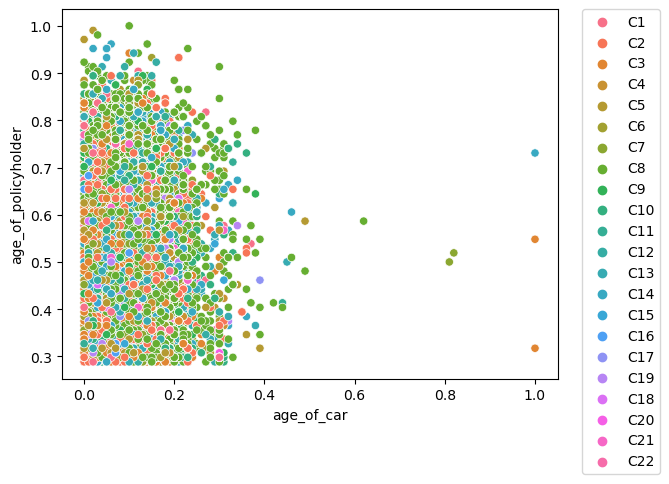

In [11]:
fig = figsize = (10,10)
sns.scatterplot(x = 'age_of_car', y = 'age_of_policyholder', hue = 'area_cluster', data = bal_df)
plt.x_axis = 'Age of car'
plt.y_axis = 'Age of Policyholder'
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# As there are not much higher age of policyholders

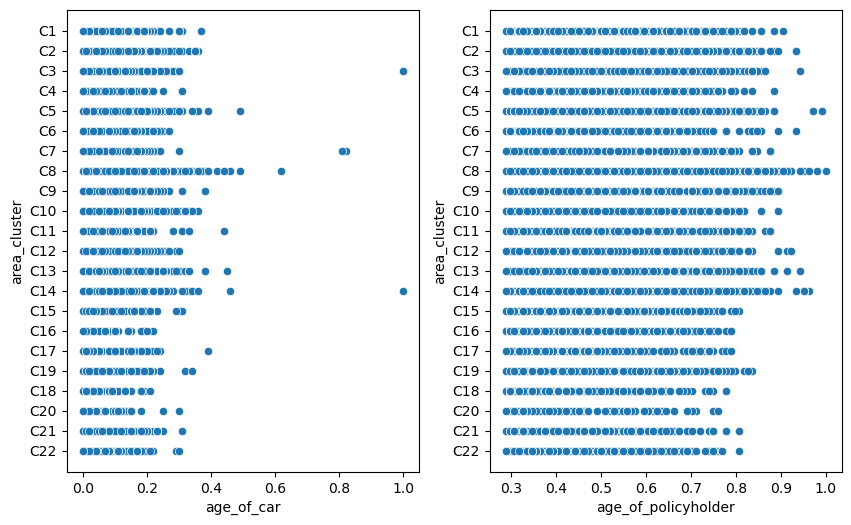

In [12]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))
sns.scatterplot(x = 'age_of_car', y = 'area_cluster', data = bal_df, ax = axes[0])
sns.scatterplot(x = 'age_of_policyholder', y = 'area_cluster', data = bal_df, ax = axes[1])

plt.show()

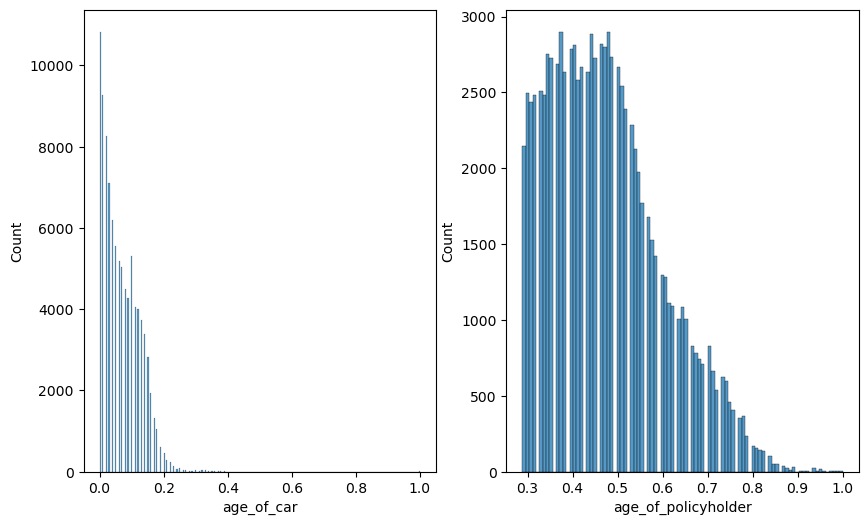

In [13]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))
sns.histplot(bal_df['age_of_car'], ax = axes[0])
sns.histplot(bal_df['age_of_policyholder'], ax = axes[1])

plt.show()

In [14]:
# ls

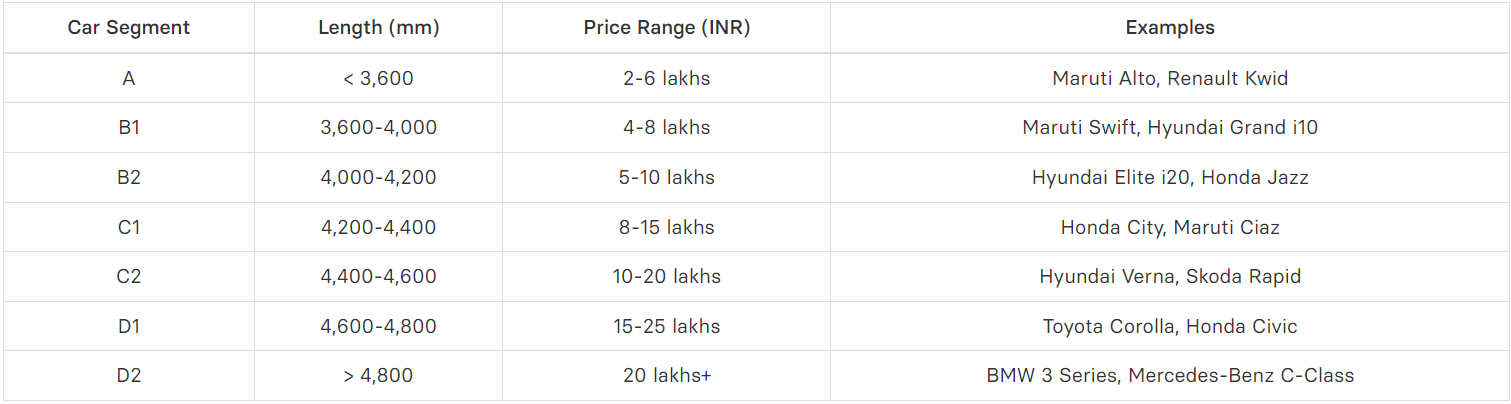

In [15]:
from IPython.display import Image, display
display(Image(filename='car segment.PNG'))

# The following image shows the segments examples and price range.

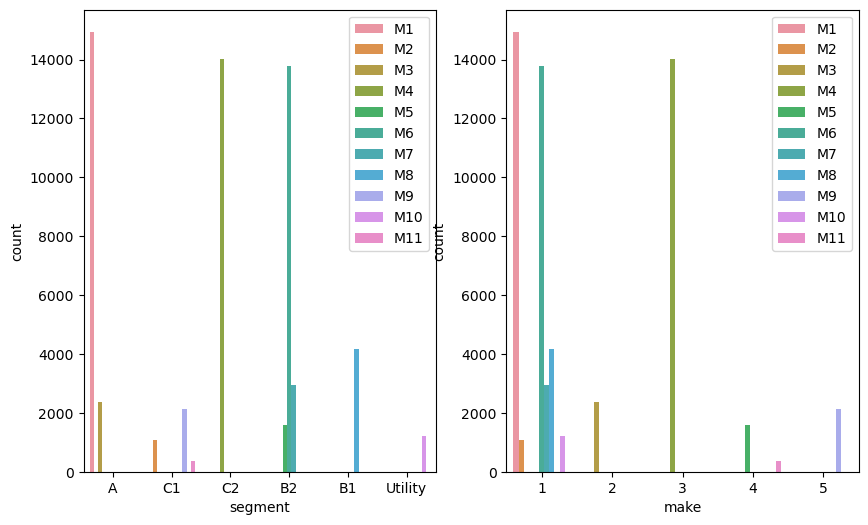

In [16]:
f, axes = plt.subplots(nrows = 1, ncols = 2,figsize = (10,6))

sns.countplot(df['segment'], data = df, hue = 'model', ax = axes[0])
axes[0].legend(loc = 'upper right')

sns.countplot(df['make'], data = df, hue = 'model', ax = axes[1])
axes[1].legend(loc='upper right')

plt.show()

# Here the count of A, B2 and C2 segments are more compare to other segments. And the model M1, M4 and M6 belongs to
# the corresponding segments.

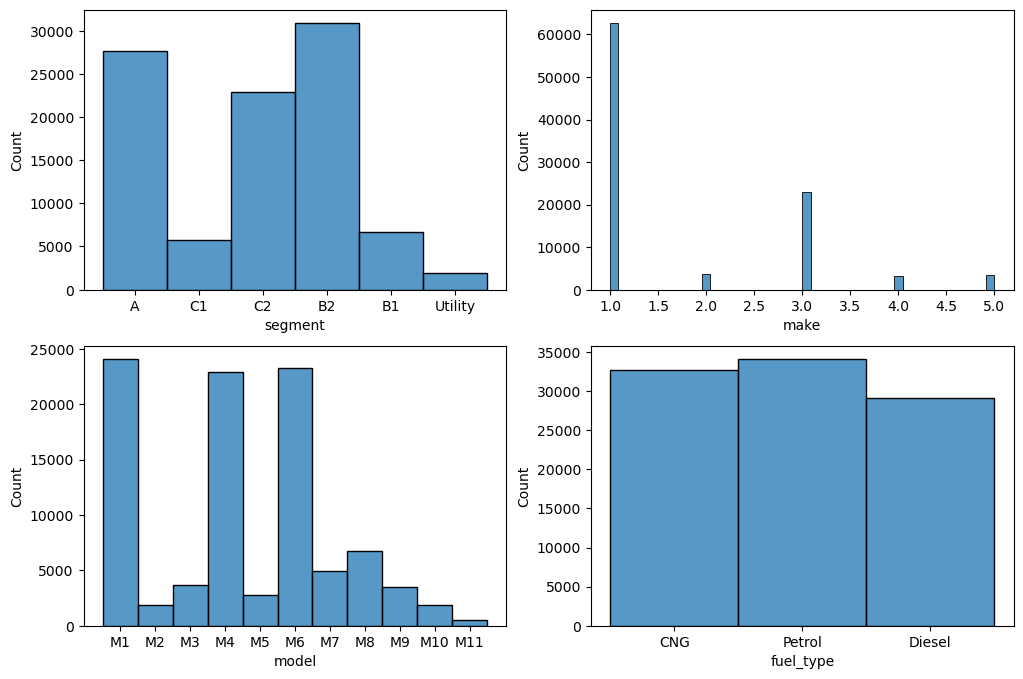

In [17]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
sns.histplot(bal_df['segment'], ax = axes[0,0])
sns.histplot(bal_df['make'], ax = axes[0,1])
sns.histplot(bal_df['model'], ax = axes[1,0])
sns.histplot(bal_df['fuel_type'], ax = axes[1,1])
plt.show()

# Here it is clearly evident from above comment for segment and model.
# And this segments are affordable.

In [18]:
bal_df.value_counts('fuel_type')

fuel_type
Petrol    34159
CNG       32695
Diesel    29123
dtype: int64

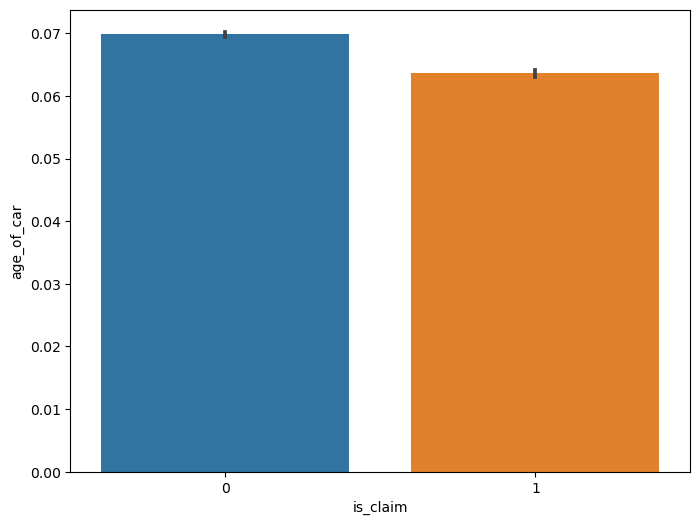

In [19]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'is_claim', y = 'age_of_car', data = bal_df)
plt.show()

In [20]:
corr_df = bal_df.corr()

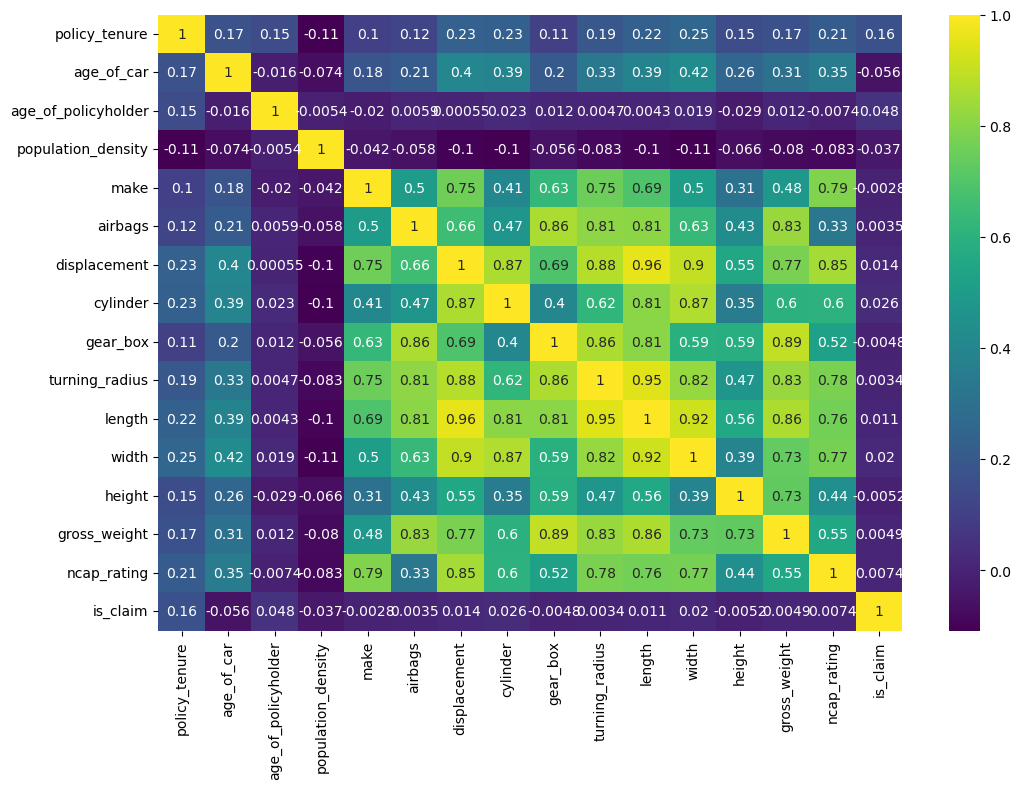

In [21]:
plt.figure(figsize = (12,8))
sns.heatmap(data = corr_df, cmap = 'viridis', annot = True)
plt.show()

# There are many co-related variables further they are dropped in terms of importance.

In [22]:
# Here I have separated max power bhp and max power rpm from the max power variable for model fitting.
# And separated max torque Nm and max torque rpm from max torque variable as well. 

In [23]:
bal_df[['max_power_bhp', 'max_power_rpm']] = bal_df['max_power'].str.split('@', expand=True)
bal_df['max_power_bhp'] = bal_df['max_power_bhp'].str.extract(r'(\d+\.?\d*)').astype(float)
bal_df['max_power_rpm'] = bal_df['max_power_rpm'].str.extract(r'(\d+)').astype(int)
bal_df.drop(columns=['max_power'], inplace=True)

In [24]:
bal_df[['max_torque_Nm', 'max_torque_rpm']] = bal_df['max_torque'].str.split('@', expand=True)
bal_df['max_torque_Nm'] = bal_df['max_torque_Nm'].str.extract(r'(\d+\.?\d*)').astype(float)
bal_df['max_torque_rpm'] = bal_df['max_torque_rpm'].str.extract(r'(\d+)').astype(int)
bal_df.drop(columns=['max_torque'], inplace=True)

In [25]:
bal_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_bhp,max_power_rpm,max_torque_Nm,max_torque_rpm
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,0,0,40.36,6000,60.0,3500
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,0,0,40.36,6000,60.0,3500
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,0,0,40.36,6000,60.0,3500
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,2,0,88.50,6000,113.0,4400
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,2,0,67.06,5500,91.0,4250


In [26]:
binary_vars = [col for col in bal_df.columns if col.startswith('is_') and col != 'is_claim']
for col in binary_vars:
    bal_df[col] = bal_df[col].map({'Yes': 'Feature Present', 'No': 'Feature Not Present'})

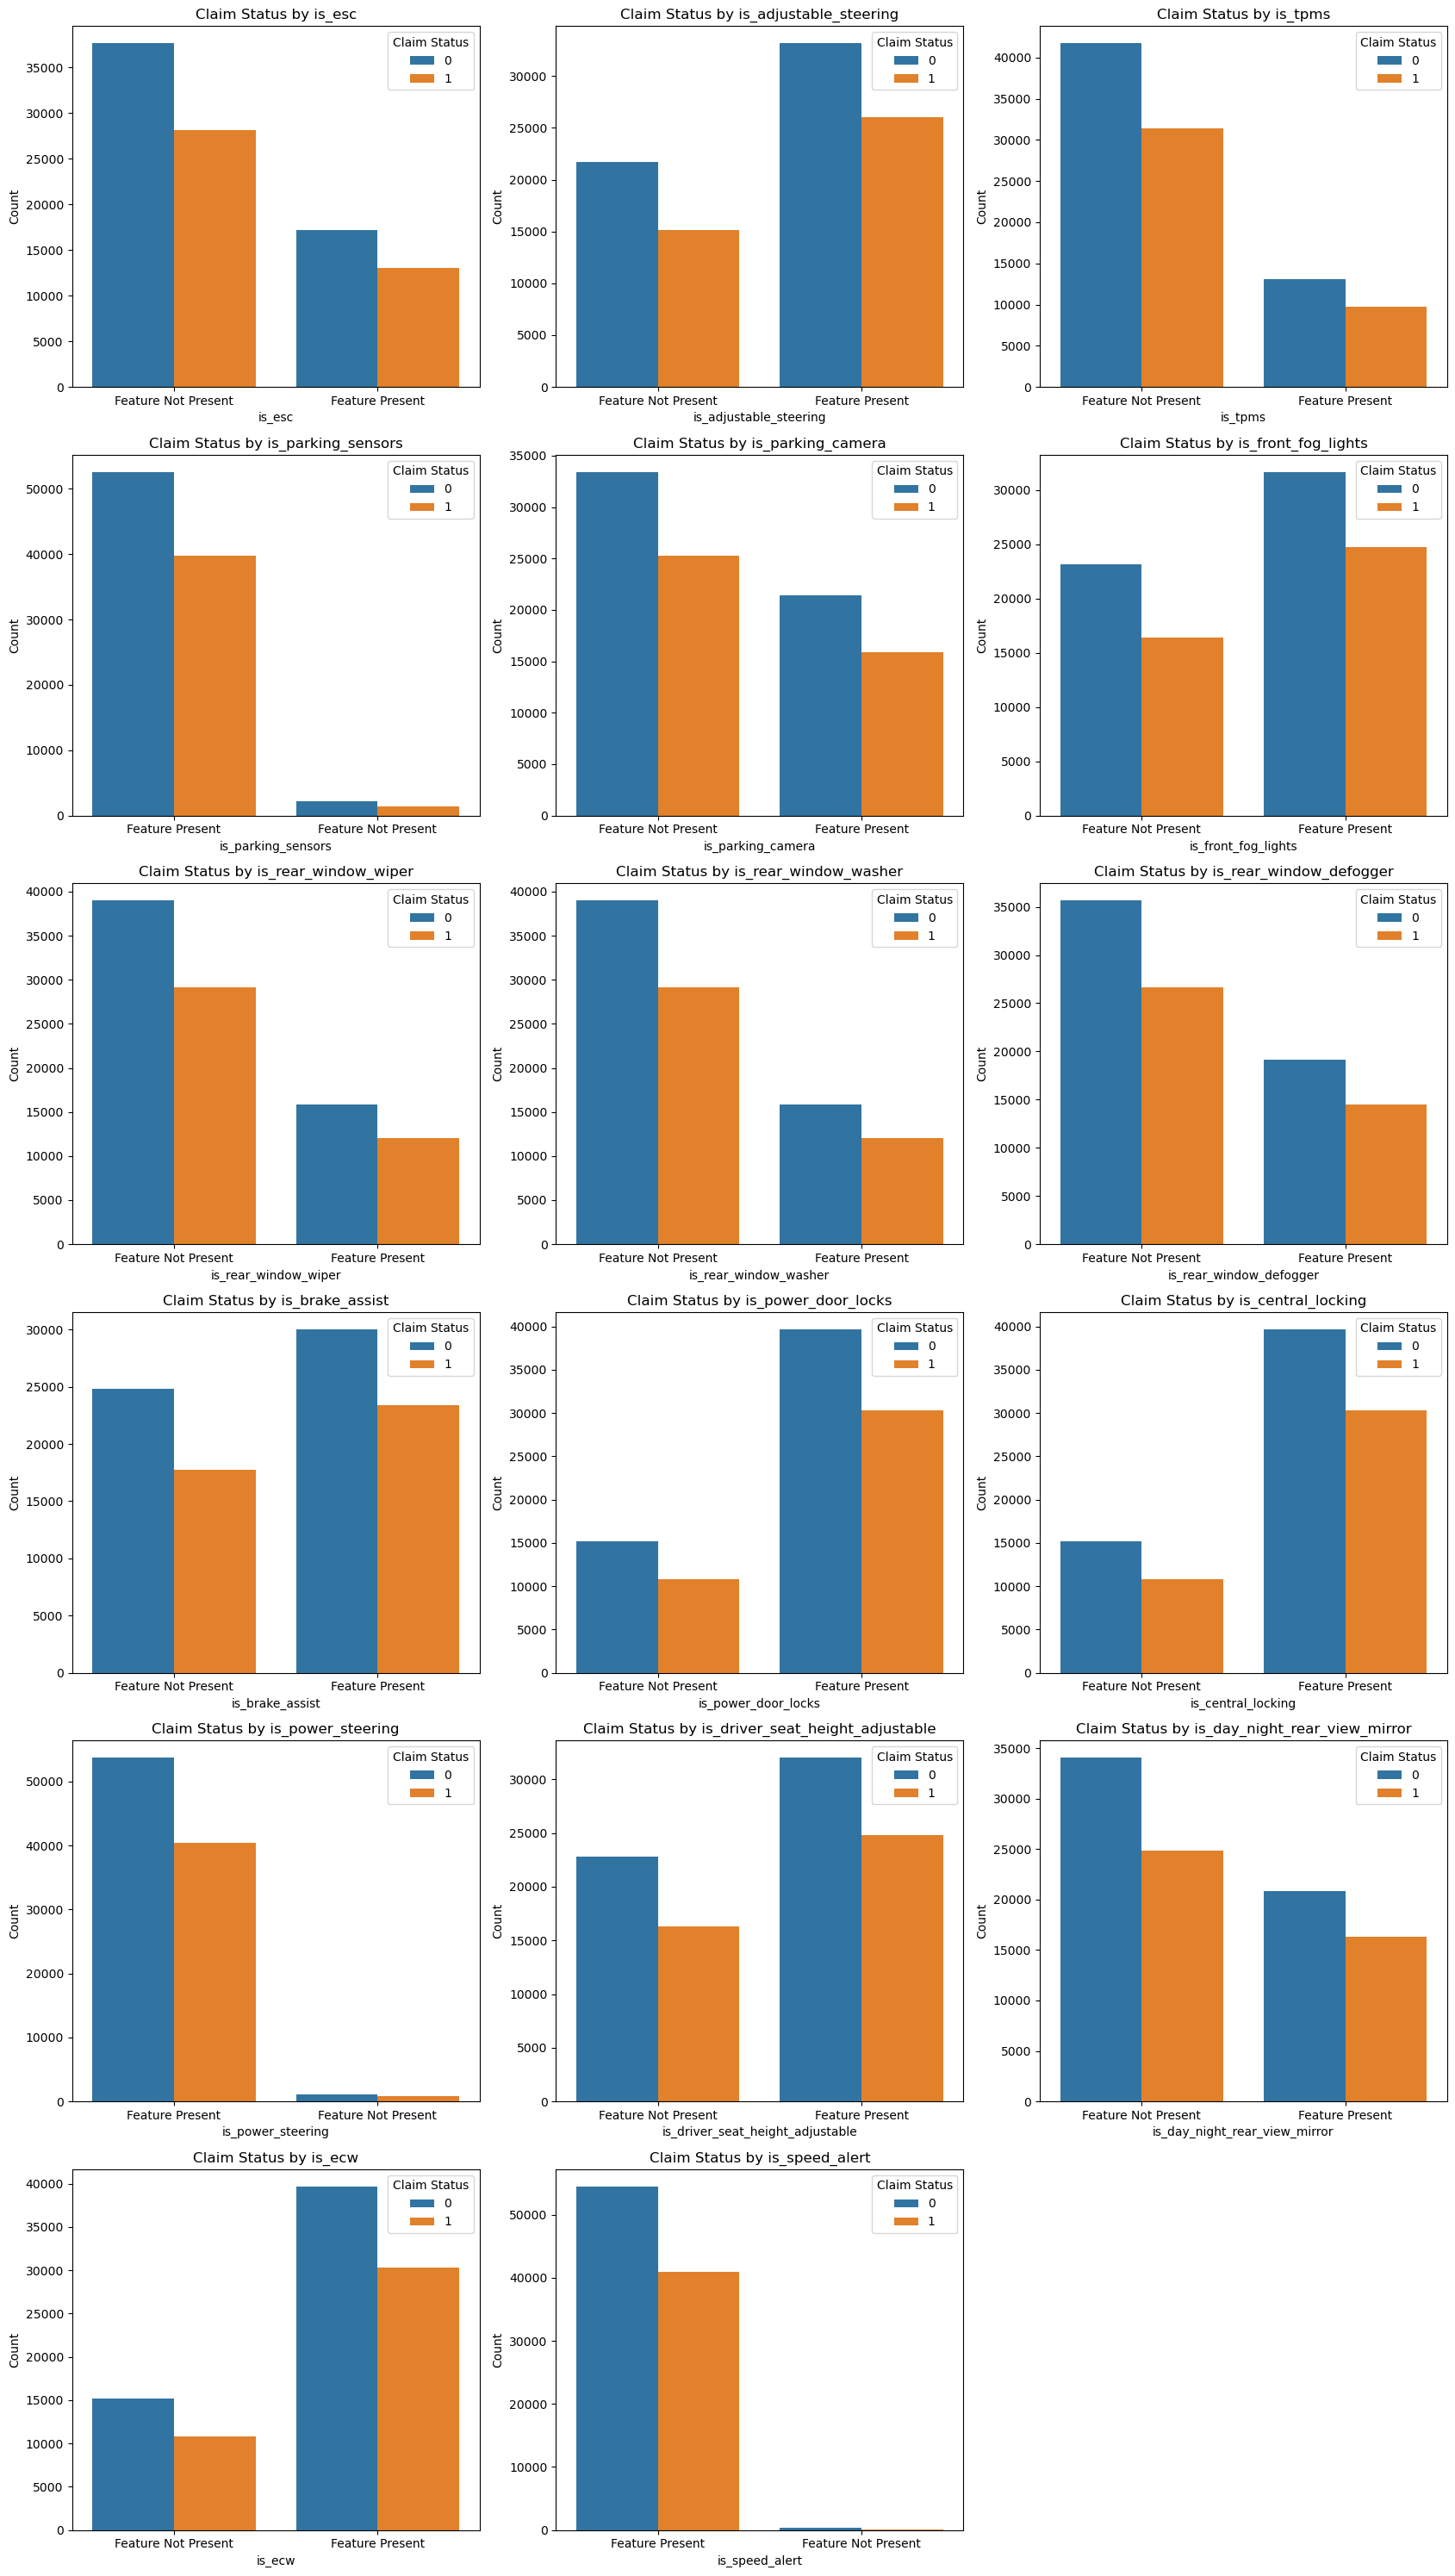

In [27]:
n_cols = 3
n_rows = (len(binary_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(binary_vars):
    sns.countplot(x=col, hue='is_claim', data=bal_df, ax=axes[i])
    axes[i].set_title(f'Claim Status by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Claim Status')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# From below graphs most of the features given to vehicle are not much useful
# because features which are potential but still there are claims done by the policyholder.
# Example : Adjustable steering, Parking sensors, Brake assist, ECW(Electronic Crash warning) 
# this features are useful to prevent accidents but claims are higher

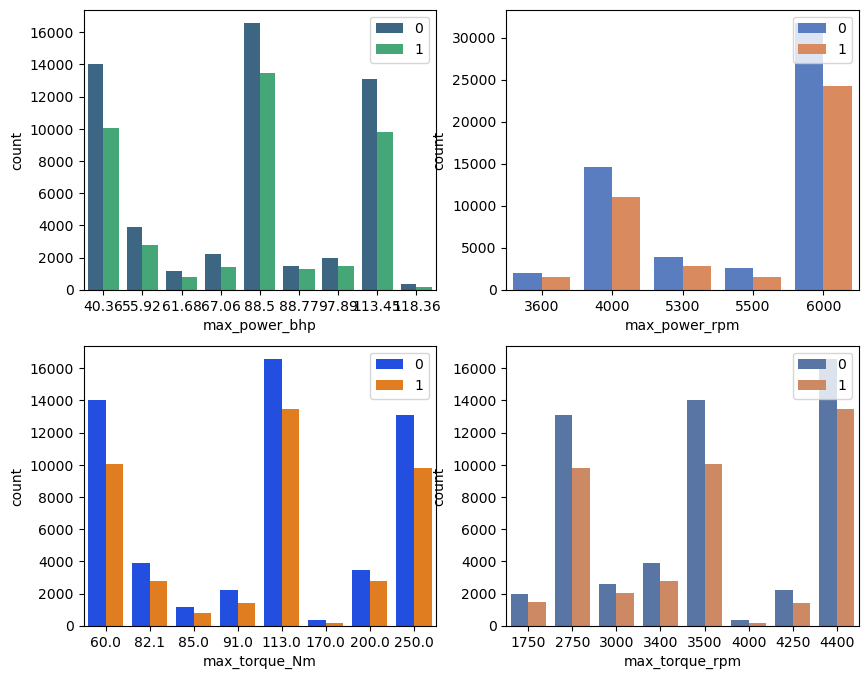

In [28]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))
sns.countplot(x = 'max_power_bhp', hue = 'is_claim', data = bal_df, palette='viridis', ax = axes[0,0])
axes[0,0].legend(loc='upper right')

sns.countplot(x = 'max_power_rpm', hue = 'is_claim', data = bal_df, palette='muted', ax = axes[0,1])
axes[0,1].legend(loc='upper right')

sns.countplot(x = 'max_torque_Nm', hue = 'is_claim', data = bal_df, palette='bright', ax = axes[1,0])
axes[1,0].legend(loc='upper right')

sns.countplot(x = 'max_torque_rpm', hue = 'is_claim', data = bal_df, palette='deep', ax = axes[1,1])
axes[1,1].legend(loc='upper right')

plt.show()

In [29]:
df['segment'] = df['segment'].astype('category')
df['is_claim'] = df['is_claim'].astype('category')
df['area_cluster'] = df['area_cluster'].astype('category')

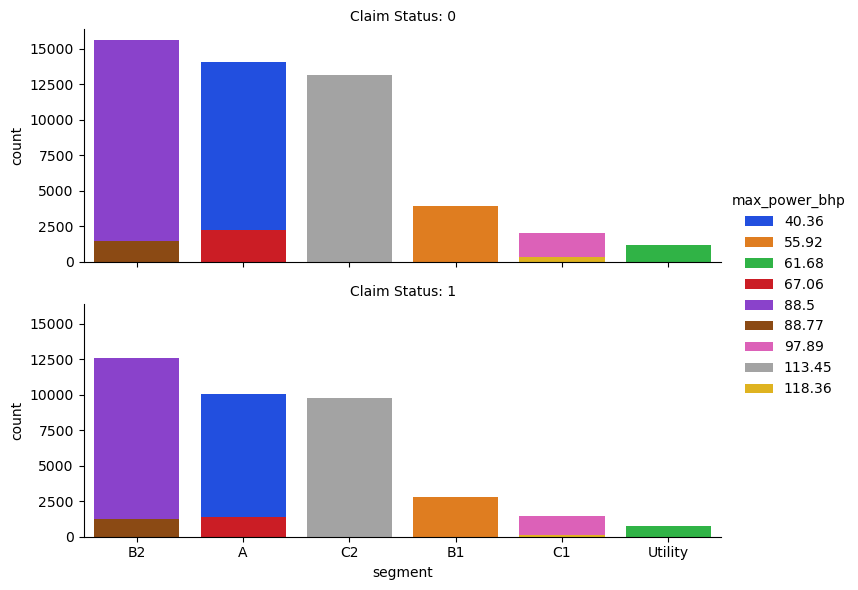

In [30]:
g = sns.FacetGrid(bal_df, row="is_claim", hue="max_power_bhp", height=3, aspect=2.5, palette='bright')
g.map(sns.countplot, "segment", x = "segment", order = bal_df['segment'].value_counts().index, dodge=True)
g.set_titles('Claim Status: {row_name}')
g.add_legend()

plt.show()

# More  claims are from A, B2 and C2 segment.
# And there is no such evidence to prove that more power leads to more claims.

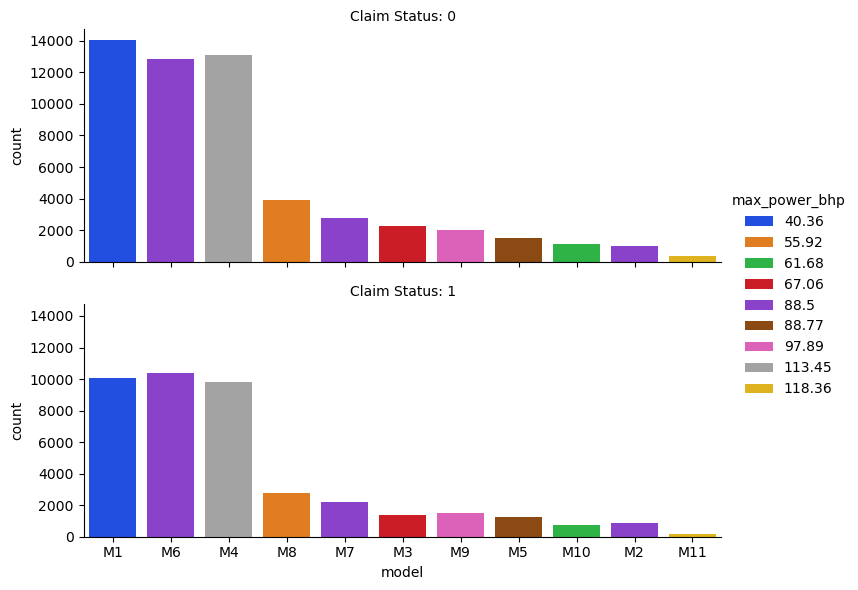

In [31]:
g = sns.FacetGrid(bal_df, row="is_claim", hue="max_power_bhp", height=3, aspect=2.5, palette='bright')
g.map_dataframe(sns.countplot, x = "model", order = bal_df['model'].value_counts().index, dodge=True)
g.set_titles('Claim Status: {row_name}')
g.add_legend()

plt.show()

# And as mentioned earlier M1, M4 and M6 most probably belongs to A, B2 and C2 segments 
# and this data points have more claims.

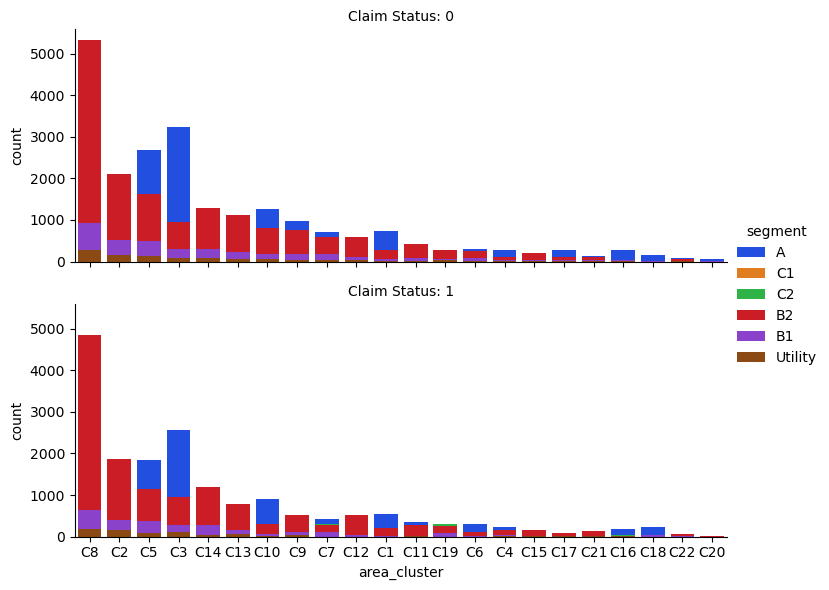

In [32]:
g = sns.FacetGrid(bal_df, row="is_claim", hue="segment", height=3, aspect=2.5, palette='bright')
g.map(sns.countplot, 'area_cluster', x = "area_cluster", order = bal_df['area_cluster'].value_counts().index, dodge=True)
g.set_titles('Claim Status: {row_name}')
g.add_legend()

plt.show()

# The higher number claims are from Cluster 2, 3, 5 and 8;
# Some chunk of claims are from Cluster 15 as well

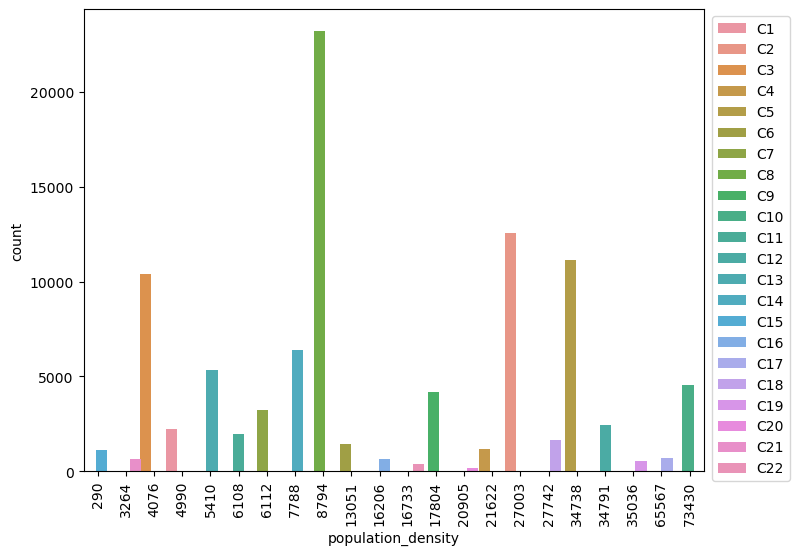

In [33]:

plt.figure(figsize = (8,6))
sns.countplot(x = 'population_density', hue = 'area_cluster', data = bal_df, linewidth=0, edgecolor='gray')
for patch in plt.gca().patches:
    current_width = patch.get_width()
    diff = current_width * 10
    patch.set_width(current_width + diff)
    patch.set_x(patch.get_x() - diff / 2)
    
legend_labels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19',
                 'C20', 'C21', 'C22']
plt.xticks(rotation = 90)
plt.legend(legend_labels, loc = 'upper right', bbox_to_anchor = (1.15, 1))

plt.show()

# By combining both above and current plot the higher population doesn't lead to higher claims.

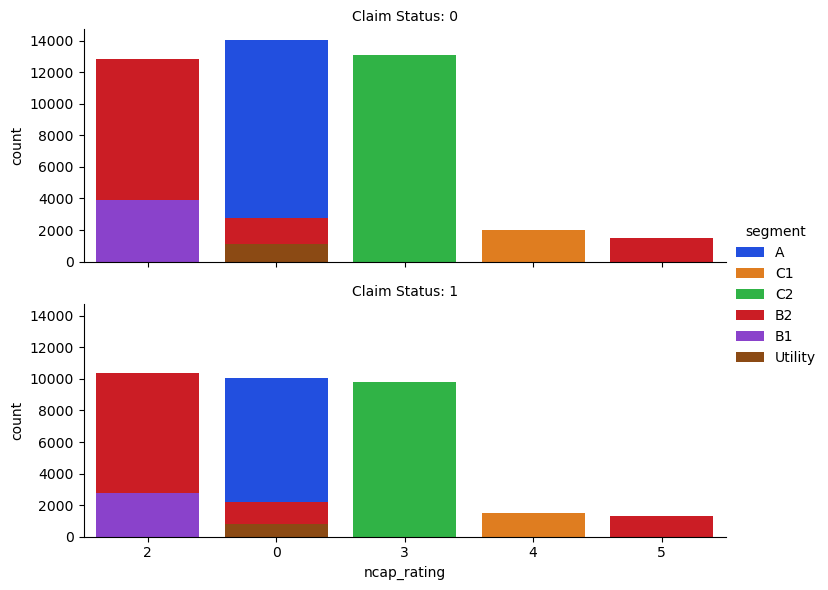

In [34]:
g = sns.FacetGrid(bal_df, row="is_claim", hue="segment", height=3, aspect=2.5, palette='bright')
g.map(sns.countplot, "ncap_rating", x = "ncap_rating", order = bal_df['ncap_rating'].value_counts().index, dodge=True)
g.set_titles('Claim Status: {row_name}')
g.add_legend()

plt.show()

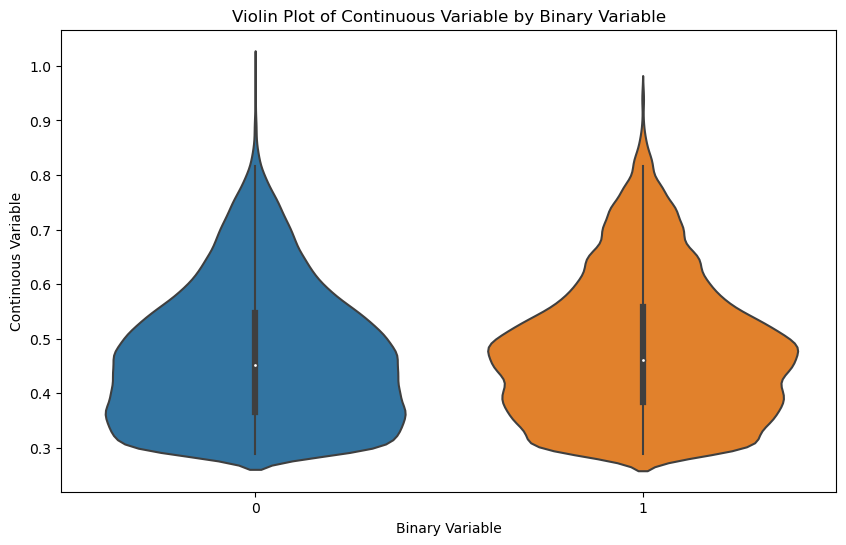

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='is_claim', y='age_of_policyholder', data=bal_df)
plt.title('Violin Plot of Continuous Variable by Binary Variable')
plt.xlabel('Binary Variable')
plt.ylabel('Continuous Variable')
plt.show()

### After EDA its evident that the claim frequency is more from Segment A, B2 and C2 and their NCAP ratings are less than 4 which leads to more severe damages in case of accidents of vehicles and due to this reason different premiums can be determined for this segments.

In [36]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95977 entries, 0 to 95976
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         95977 non-null  object 
 1   policy_tenure                     95977 non-null  float64
 2   age_of_car                        95977 non-null  float64
 3   age_of_policyholder               95977 non-null  float64
 4   area_cluster                      95977 non-null  object 
 5   population_density                95977 non-null  int64  
 6   make                              95977 non-null  int64  
 7   segment                           95977 non-null  object 
 8   model                             95977 non-null  object 
 9   fuel_type                         95977 non-null  object 
 10  engine_type                       95977 non-null  object 
 11  airbags                           95977 non-null  int64  
 12  is_e

## Feature extraction

In [37]:
bal_df = bal_df.drop(['length', 'height', 'width', 'gross_weight','turning_radius', 'policy_id', 'engine_type'], axis = 1)

In [38]:
bal_df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_bhp,max_power_rpm,max_torque_Nm,max_torque_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,2,...,Feature Present,Feature Present,Feature Present,Feature Present,2,0,88.50,6000,113.0,4400
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,2,...,Feature Not Present,Feature Present,Feature Present,Feature Present,2,0,67.06,5500,91.0,4250


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
bal_df

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_bhp,max_power_rpm,max_torque_Nm,max_torque_rpm
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,2,...,Feature Not Present,Feature Not Present,Feature Not Present,Feature Present,0,0,40.36,6000,60.0,3500
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,2,...,Feature Present,Feature Present,Feature Present,Feature Present,2,0,88.50,6000,113.0,4400
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,2,...,Feature Not Present,Feature Present,Feature Present,Feature Present,2,0,67.06,5500,91.0,4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95972,1.049545,0.06,0.432692,C14,7788,1,B2,M6,Petrol,2,...,Feature Present,Feature Present,Feature Present,Feature Present,2,1,88.50,6000,113.0,4400
95973,1.002915,0.07,0.317308,C5,34738,1,B2,M6,Petrol,2,...,Feature Present,Feature Present,Feature Present,Feature Present,2,1,88.50,6000,113.0,4400
95974,0.802022,0.10,0.480769,C3,4076,3,C2,M4,Diesel,6,...,Feature Present,Feature Not Present,Feature Present,Feature Present,3,1,113.45,4000,250.0,2750
95975,0.288482,0.10,0.586538,C8,8794,1,B1,M8,CNG,2,...,Feature Not Present,Feature Not Present,Feature Present,Feature Present,2,1,55.92,5300,82.1,3400


In [41]:
categorical_columns = bal_df.select_dtypes(include = ['object', 'category']).columns.tolist()

### Encoding categorical features

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [44]:
for col in categorical_columns:
    bal_df[col] = le.fit_transform(bal_df[col])
    
bal_df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,...,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,max_power_bhp,max_power_rpm,max_torque_Nm,max_torque_rpm
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,2,...,0,0,0,1,0,0,40.36,6000,60.0,3500
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,2,...,0,0,0,1,0,0,40.36,6000,60.0,3500
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,2,...,0,0,0,1,0,0,40.36,6000,60.0,3500
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,2,...,1,1,1,1,2,0,88.50,6000,113.0,4400
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,2,...,0,1,1,1,2,0,67.06,5500,91.0,4250


In [45]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95977 entries, 0 to 95976
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     95977 non-null  float64
 1   age_of_car                        95977 non-null  float64
 2   age_of_policyholder               95977 non-null  float64
 3   area_cluster                      95977 non-null  int32  
 4   population_density                95977 non-null  int64  
 5   make                              95977 non-null  int64  
 6   segment                           95977 non-null  int32  
 7   model                             95977 non-null  int32  
 8   fuel_type                         95977 non-null  int32  
 9   airbags                           95977 non-null  int64  
 10  is_esc                            95977 non-null  int32  
 11  is_adjustable_steering            95977 non-null  int32  
 12  is_t

### Separating Independent features and dependent feature

In [46]:
X = bal_df.drop(['is_claim'], axis = 1)
Y = bal_df['is_claim']

In [47]:
X

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,airbags,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,max_power_bhp,max_power_rpm,max_torque_Nm,max_torque_rpm
0,0.515874,0.05,0.644231,0,4990,1,0,0,0,2,...,1,0,0,0,1,0,40.36,6000,60.0,3500
1,0.672619,0.02,0.375000,11,27003,1,0,0,0,2,...,1,0,0,0,1,0,40.36,6000,60.0,3500
2,0.841110,0.02,0.384615,15,4076,1,0,0,0,2,...,1,0,0,0,1,0,40.36,6000,60.0,3500
3,0.900277,0.11,0.432692,16,21622,1,3,3,2,2,...,1,1,1,1,1,2,88.50,6000,113.0,4400
4,0.596403,0.11,0.634615,17,34738,2,0,4,2,2,...,1,0,1,1,1,2,67.06,5500,91.0,4250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95972,1.049545,0.06,0.432692,5,7788,1,2,7,2,2,...,1,1,1,1,1,2,88.50,6000,113.0,4400
95973,1.002915,0.07,0.317308,17,34738,1,2,7,2,2,...,1,1,1,1,1,2,88.50,6000,113.0,4400
95974,0.802022,0.10,0.480769,15,4076,3,4,5,1,6,...,1,1,0,1,1,3,113.45,4000,250.0,2750
95975,0.288482,0.10,0.586538,20,8794,1,1,9,0,2,...,1,0,0,1,1,2,55.92,5300,82.1,3400


In [48]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
95972    1
95973    1
95974    1
95975    1
95976    1
Name: is_claim, Length: 95977, dtype: int64

#### Splitting the data for training and testing

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

### Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Importing needed algorithms 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Decision Tree

In [53]:
dt = DecisionTreeClassifier(max_depth = 60, random_state = 52)

In [54]:
dt.fit(X_train_scaled, Y_train)
y_pred = dt.predict(X_test_scaled)

In [55]:
accuracy_dt = accuracy_score(y_pred, Y_test)
accuracy_dt * 100

95.32715148989372

In [56]:
cm_dt = confusion_matrix(y_pred, Y_test)
cm_dt

array([[10036,     0],
       [  897,  8263]], dtype=int64)

In [57]:
report_dt = classification_report(y_pred, Y_test)
print(report_dt)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10036
           1       1.00      0.90      0.95      9160

    accuracy                           0.95     19196
   macro avg       0.96      0.95      0.95     19196
weighted avg       0.96      0.95      0.95     19196



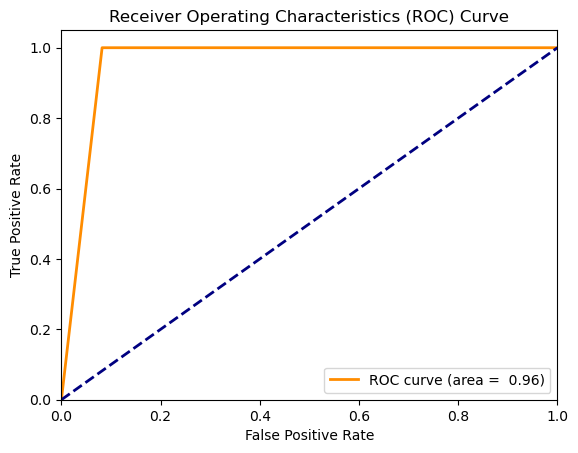

In [58]:
y_pred_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw =2, color = 'darkorange', label = f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

# Logistic Regression

In [59]:
lg = LogisticRegression(max_iter = 1000, solver = 'lbfgs', C = 1.0, penalty = 'l2')

In [62]:
lg.fit(X_train_scaled, Y_train)
y_pred_lg = lg.predict(X_test_scaled)

In [64]:
pred_lg = accuracy_score(y_pred_lg, Y_test)
pred_lg*100

59.33527818295479

In [65]:
cm_lg = confusion_matrix(y_pred_lg, Y_test)
cm_lg

array([[8579, 5452],
       [2354, 2811]], dtype=int64)

In [66]:
report_lg = classification_report(y_pred_lg, Y_test)
print(report_lg)

              precision    recall  f1-score   support

           0       0.78      0.61      0.69     14031
           1       0.34      0.54      0.42      5165

    accuracy                           0.59     19196
   macro avg       0.56      0.58      0.55     19196
weighted avg       0.67      0.59      0.62     19196



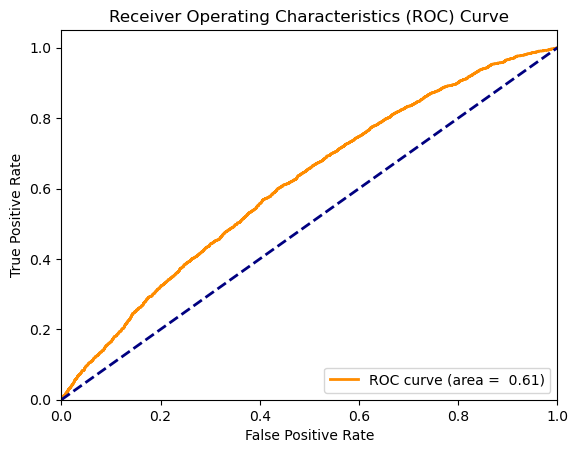

In [67]:
y_pred_proba_lg = lg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba_lg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw =2, color = 'darkorange', label = f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

# Random Forest

In [68]:
rf = RandomForestClassifier(n_estimators = 130, max_depth = 100,
                            min_samples_split = 10, criterion = 'entropy', 
                            min_samples_leaf = 5, bootstrap = True, 
                            max_features = 'auto', random_state = 101)

In [69]:
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=130,
                       random_state=101)

In [70]:
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_pred_rf, Y_test)
accuracy_rf * 100

95.07188997707856

In [71]:
cm_rf = confusion_matrix(y_pred_rf, Y_test)
print(cm_rf)

[[10195   208]
 [  738  8055]]


In [72]:
report_rf = classification_report(y_pred_rf, Y_test)
print(report_rf)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10403
           1       0.97      0.92      0.94      8793

    accuracy                           0.95     19196
   macro avg       0.95      0.95      0.95     19196
weighted avg       0.95      0.95      0.95     19196



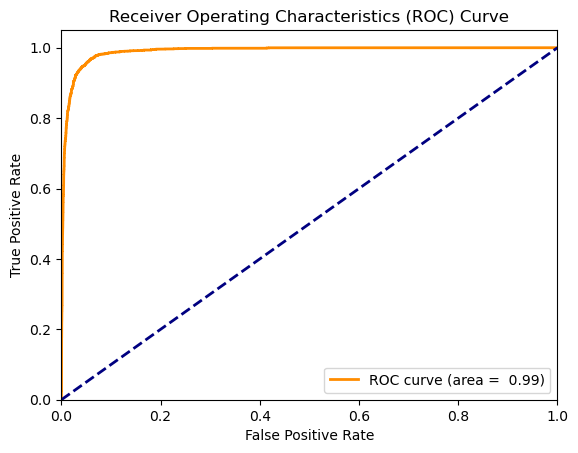

In [73]:
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw =2, color = 'darkorange', label = f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

# K Nearest Neighbour

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [76]:
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
accuracy_knn * 100

87.96103354865596

In [77]:
cm_knn = confusion_matrix(y_pred_knn, Y_test)
print(cm_rf)

[[10195   208]
 [  738  8055]]


In [78]:
report_knn = classification_report(y_pred_knn, Y_test)
print(report_knn)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      8734
           1       0.99      0.78      0.88     10462

    accuracy                           0.88     19196
   macro avg       0.89      0.89      0.88     19196
weighted avg       0.90      0.88      0.88     19196



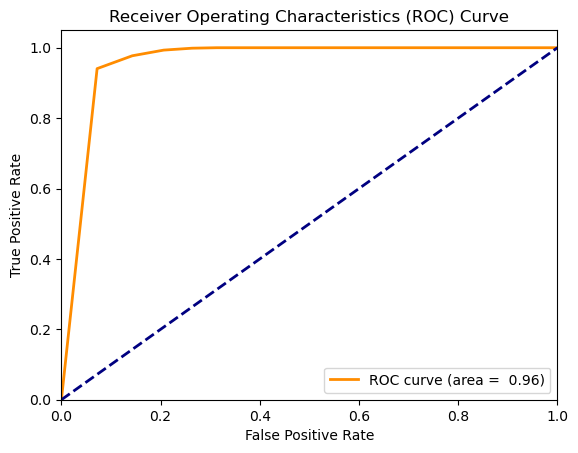

In [79]:
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(Y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, lw =2, color = 'darkorange', label = f'ROC curve (area = {roc_auc: .2f})')
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()